## Exploratory Project - Smit Lunagariya

#### Weighted Twin Support Vector Regression

In [12]:
# Importing required libraries

import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [13]:
# Importing Weighted Twin Support Vector Regression from wtsvr
from algorithms import WeightedTSVR

In [14]:
# Creating the artificial data set
x = np.linspace(-10.2, 10, num=81).reshape(-1, 1)
y = np.sin(x)/x
yhat = y + np.random.normal(scale=0.1, size=81).reshape(-1, 1) #Adding noise to original labels

In [15]:
wtsvr = WeightedTSVR(c1=0.10, c2=0.10, e1=10, e2=10, sigma=81, regul=0.0000001, sai1=0.1, sai2=0.1)

In [16]:
# Fit the data features that are to be learned by the model
wtsvr.fit(x, yhat)

     pcost       dcost       gap    pres   dres
 0: -8.1003e+03  9.0081e+02  3e+03  2e+02  1e-01
 1: -7.9693e+01 -8.0166e-01  4e+01  2e+00  1e-03
 2: -7.9775e-01 -8.2619e-01  1e+00  2e-02  1e-05
 3: -4.5478e-02 -7.7868e-02  8e-02  1e-03  6e-07
 4: -2.6522e-02 -3.3981e-02  1e-02  1e-04  8e-08
 5: -2.8990e-02 -3.0369e-02  2e-03  1e-05  9e-09
 6: -2.9619e-02 -2.9795e-02  2e-04  1e-06  8e-10
 7: -2.9715e-02 -2.9721e-02  7e-06  1e-08  7e-12
 8: -2.9719e-02 -2.9719e-02  2e-07  2e-10  2e-13
 9: -2.9719e-02 -2.9719e-02  4e-09  3e-12  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.1003e+03  9.0081e+02  3e+03  2e+02  1e-01
 1: -7.9693e+01 -8.0166e-01  4e+01  2e+00  1e-03
 2: -7.9774e-01 -8.2618e-01  1e+00  2e-02  1e-05
 3: -4.5476e-02 -7.7865e-02  8e-02  1e-03  6e-07
 4: -2.6514e-02 -3.3972e-02  1e-02  1e-04  8e-08
 5: -2.8982e-02 -3.0360e-02  2e-03  1e-05  9e-09
 6: -2.9616e-02 -2.9780e-02  2e-04  1e-06  7e-10
 7: -2.9706e-02 -2.9712e-02  6e-06  1e-08  6e-1

In [17]:
pred = wtsvr.predict(x)

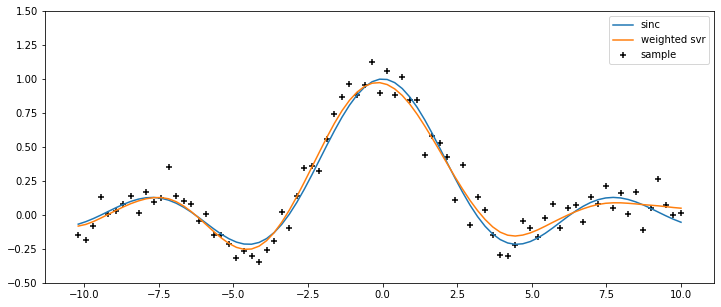

In [18]:
# Visualizing the original synthetic dataset with the output produced
plt.figure(figsize=(12, 5))
plt.plot(x, y,label='sinc')
plt.scatter(x, yhat, marker='+', label='sample', color='black')
plt.plot(x, pred,label='weighted svr')
plt.ylim([-0.5, 1.5])
plt.legend()

In [19]:
# Evaluation of the results based on various metrics
def Evaluation_of_result(y, ypred):
    def mean_abs_error(y, ypred):
        return mean_absolute_error(y, ypred)

    def root_mean_sq_error(y, ypred):
        return math.sqrt(mean_squared_error(y, ypred))

    def SSE(y, ypred):
        y.reshape(-1, 1)
        ypred.reshape(-1, 1)
        return mean_squared_error(y, ypred)*(y.shape[0])

    def SST(y):
        y.reshape(-1, 1)
        return np.var(y)*(y.shape[0])

    def SSR(ypred):
        ypred.reshape(-1, 1)
        return np.var(ypred)*(ypred.shape[0])

    print("MAE: ", mean_abs_error(y, ypred))
    print("RMSE: ", root_mean_sq_error(y, ypred))
    print("SSE: ", SSE(y, ypred))
    print("SSR: ", SSR(ypred))
    print("SST: ", SST(y))
    print("SSR/SST: ", SSR(ypred)/SST(y))
    print("SSE/SST: ", SSE(y,ypred)/SST(y))

In [20]:
print("The evaluation of results of Weighted Twin SVR are as follows:")
Evaluation_of_result(y, pred)

The evaluation of results of Weighted Twin SVR are as follows:
MAE:  0.03216845758122385
RMSE:  0.03838077464927315
SSE:  0.11931979287694135
SSR:  9.520457055948102
SST:  9.942618950174554
SSR/SST:  0.9575401716245959
SSE/SST:  0.01200084137538496
